In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [8]:
col = ['Id', 'Entity', 'Sentiment', 'Content']
df_train = pd.read_csv("./twitter_training.csv", names=col)
df_test = pd.read_csv("./twitter_validation.csv", names=col)

In [9]:
df_train.dropna(subset=['Content'], inplace=True)
df_train['Sentiment'].replace('Irrelevant', 'Neutral', inplace=True)
df_test['Sentiment'].replace('Irrelevant', 'Neutral', inplace=True)

Text(0, 0.5, 'Count')

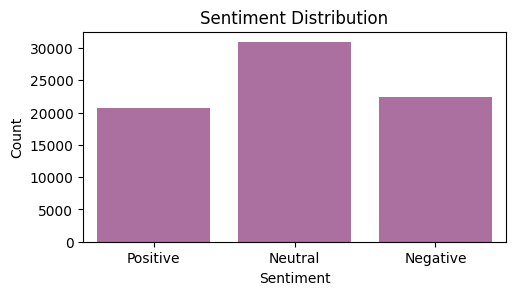

In [10]:
sentiment_count = df_train['Sentiment'].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.countplot(x='Sentiment', data=df_train, color='#B565A7')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')

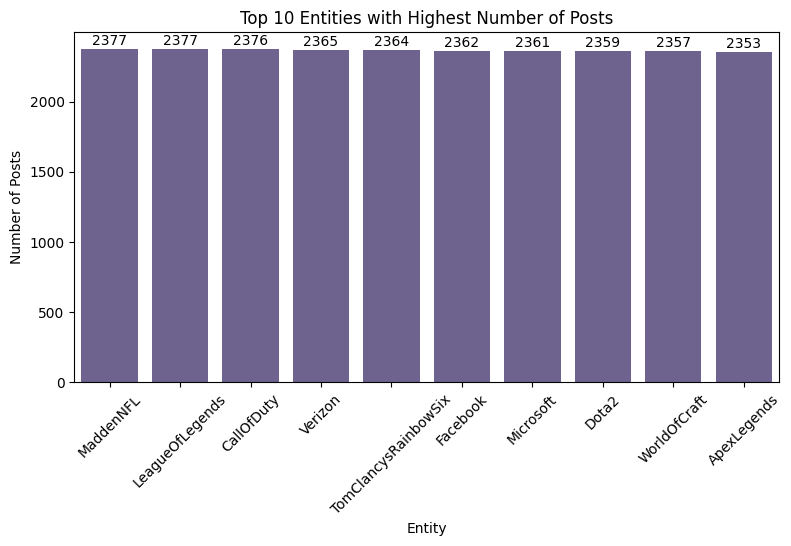

In [11]:
# Visualize Entity Distribution with count labels (addressing the FutureWarning)
entity_count = df_train['Entity'].value_counts().head(10)
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 2)
sns.barplot(x=entity_count.index, y=entity_count.values, color='#6B5B95')  # Use color instead of palette
plt.title('Top 10 Entities with Highest Number of Posts')
plt.xlabel('Entity')
plt.ylabel('Number of Posts')
plt.xticks(rotation=45)
for i, count in enumerate(entity_count.values):
    plt.text(i, count + 10, str(count), ha='center', va='bottom')


NameError: name 'sentiment_by_entity' is not defined

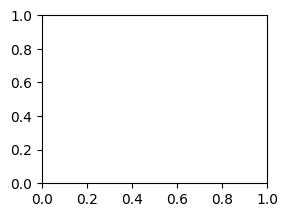

In [12]:
plt.figure(figsize=(20, 10))
plt.subplot(2, 2, 3)
sns.heatmap(sentiment_by_entity, annot=True, cmap='coolwarm', fmt='g')
plt.title('Sentiment Distribution for Top 3 Entities')
plt.xlabel('Sentiment')
plt.ylabel('Entity')


In [ ]:
plt.figure(figsize=(20, 10))
df_train['Content_Length'] = df_train['Content'].apply(len)
plt.subplot(2, 2, 4)
sns.histplot(df_train['Content_Length'], kde=True, color='skyblue')
plt.title('Distribution of Content Length')
plt.xlabel('Content Length')
plt.ylabel('Count')


In [ ]:
plt.tight_layout()
plt.show()

In [ ]:
df_train.drop(['Id', 'Entity', 'Content_Length'], axis=1, inplace=True)
df_test.drop(['Id', 'Entity'], axis=1, inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_train['Content'], df_train['Sentiment'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [ ]:
model = MultinomialNB()
model.fit(X_train_count, y_train_encoded)

In [ ]:
test_comment = ['I am coming to the borders and I will kill you.']
test_comment_count = vectorizer.transform(test_comment)
predicted_sentiment = label_encoder.inverse_transform(model.predict(test_comment_count))
print(f'Predicted Sentiment: {predicted_sentiment[0]}')

In [ ]:
y_pred = model.predict(X_test_count)
accuracy = accuracy_score(y_test_encoded, y_pred)
print(f'Model Accuracy: {accuracy:.2f}')

In [ ]:
print('\nClassification Report:')
print(classification_report(y_test_encoded, y_pred))